
Entrenando modelo: Logistic Regression (Escenario A)


c:\Users\drios\OneDrive\Desktop\Python\env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


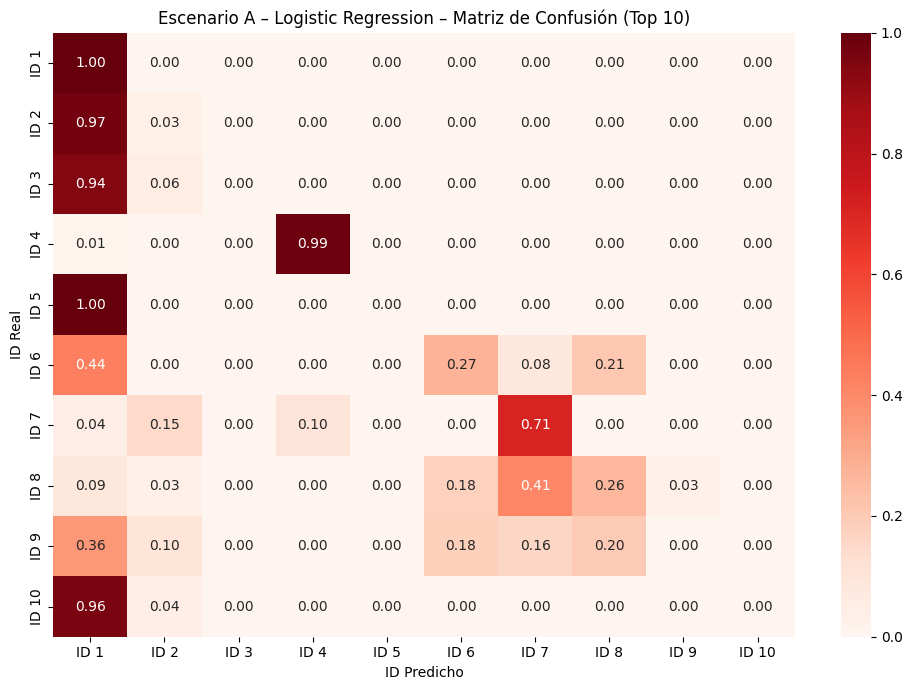


--- Referencia de IDs para el Modelo: Logistic Regression (Escenario A) ---
 ID                                                                            Nombre Real
  1                                                                    146101 - PH CESÁREA
  2 146121 - PH PARTO VAGINAL CON PROCED., EXCEPTO ESTERILIZACIÓN Y/O DILATACIÓN Y LEGRADO
  3                                                              146131 - PH PARTO VAGINAL
  4                    158171 - MH NEONATO, PESO AL NACER >2499 GR SIN PROCEDIMIENTO MAYOR
  5                                                   134161 - MH TRASTORNOS DEL ANTEPARTO
  6                                              071141 - PH COLECISTECTOMÍA LAPAROSCÓPICA
  7                            044153 - MH INFECCIONES E INFLAMACIONES RESPIRATORIAS W/MCC
  8                    041023 - PH VENTILACIÓN MECÁNICA PROLONGADA SIN TRAQUEOSTOMÍA W/MCC
  9                                              061131 - PH PROCEDIMIENTOS SOBRE APÉNDICE
 10          

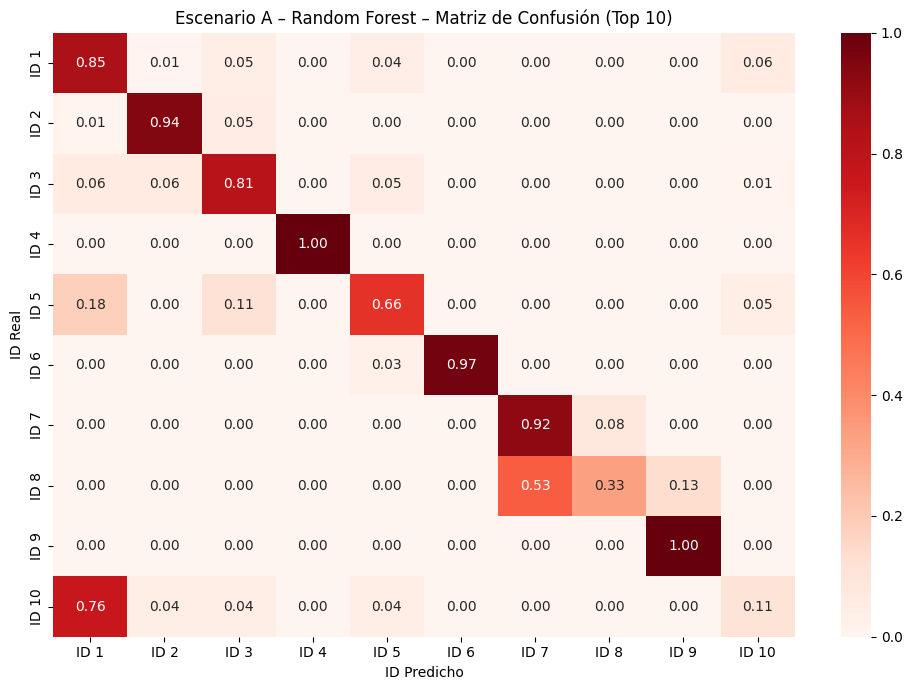


--- Referencia de IDs para el Modelo: Random Forest (Escenario A) ---
 ID                                                                            Nombre Real
  1                                                                    146101 - PH CESÁREA
  2 146121 - PH PARTO VAGINAL CON PROCED., EXCEPTO ESTERILIZACIÓN Y/O DILATACIÓN Y LEGRADO
  3                                                              146131 - PH PARTO VAGINAL
  4                    158171 - MH NEONATO, PESO AL NACER >2499 GR SIN PROCEDIMIENTO MAYOR
  5                                                   134161 - MH TRASTORNOS DEL ANTEPARTO
  6                                              071141 - PH COLECISTECTOMÍA LAPAROSCÓPICA
  7                            044153 - MH INFECCIONES E INFLAMACIONES RESPIRATORIAS W/MCC
  8                    041023 - PH VENTILACIÓN MECÁNICA PROLONGADA SIN TRAQUEOSTOMÍA W/MCC
  9                                              061131 - PH PROCEDIMIENTOS SOBRE APÉNDICE
 10                

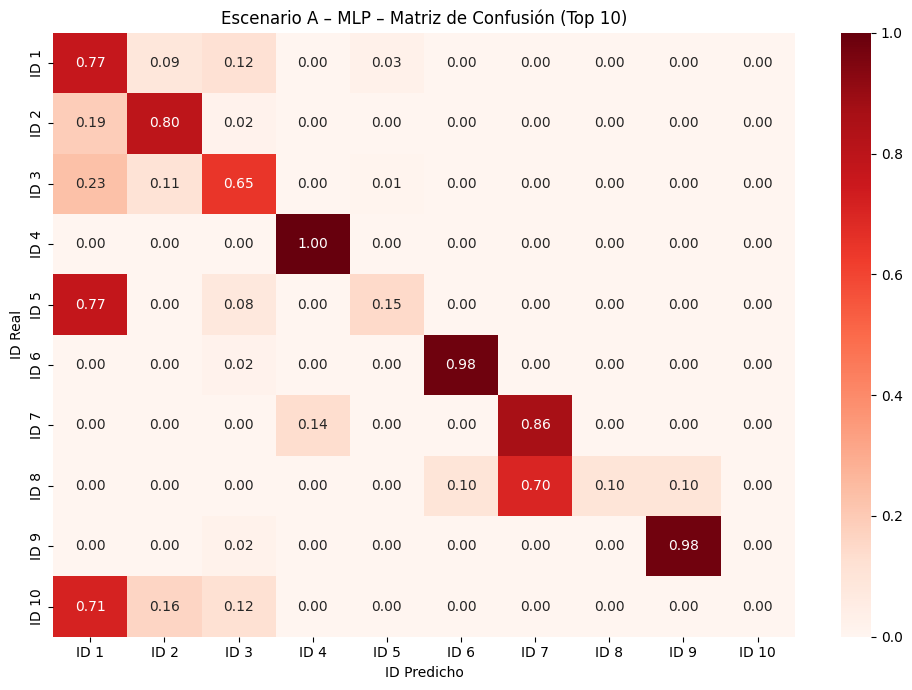


--- Referencia de IDs para el Modelo: MLP (Escenario A) ---
 ID                                                                            Nombre Real
  1                                                                    146101 - PH CESÁREA
  2 146121 - PH PARTO VAGINAL CON PROCED., EXCEPTO ESTERILIZACIÓN Y/O DILATACIÓN Y LEGRADO
  3                                                              146131 - PH PARTO VAGINAL
  4                    158171 - MH NEONATO, PESO AL NACER >2499 GR SIN PROCEDIMIENTO MAYOR
  5                                                   134161 - MH TRASTORNOS DEL ANTEPARTO
  6                                              071141 - PH COLECISTECTOMÍA LAPAROSCÓPICA
  7                            044153 - MH INFECCIONES E INFLAMACIONES RESPIRATORIAS W/MCC
  8                    041023 - PH VENTILACIÓN MECÁNICA PROLONGADA SIN TRAQUEOSTOMÍA W/MCC
  9                                              061131 - PH PROCEDIMIENTOS SOBRE APÉNDICE
 10                          

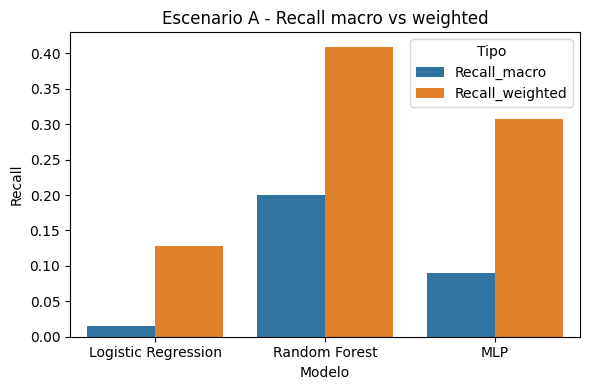

In [4]:
# ========= ESCENARIO A – Early Minimal =========

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, recall_score,
    roc_auc_score, brier_score_loss, confusion_matrix
)

# ------------------ PARÁMETROS ------------------
TOP_K = 10
MIN_SAMPLES = 5
RANDOM_STATE = 42

# ------------------ UTILIDADES ------------------
def accuracy_at_k(y_true, y_proba, k=5):
    top_k = np.argsort(y_proba, axis=1)[:, -k:]
    return np.mean([y_true[i] in top_k[i] for i in range(len(y_true))])


# ------------------ CARGA DATOS ------------------
df = pd.read_csv(r"C:\Users\drios\OneDrive\Desktop\Python\MSI608_Proyecto_1\Datasets\dataset_elpino.csv", sep=None, engine="python")

# ------------------  ------------------
df_a = df[
    ["Diag 01 Principal (cod+des)", "Edad en años", "Sexo (Desc)", "GRD"]
].dropna()

le_diag, le_sex, le_grd = LabelEncoder(), LabelEncoder(), LabelEncoder()

df_a["Diag01_enc"] = le_diag.fit_transform(df_a["Diag 01 Principal (cod+des)"])
df_a["Sexo_enc"] = le_sex.fit_transform(df_a["Sexo (Desc)"])

X = df_a[["Diag01_enc", "Edad en años", "Sexo_enc"]]
y = le_grd.fit_transform(df_a["GRD"])

# ------------------ FILTRO CLASES  ------------------
counts = pd.Series(y).value_counts()
valid = counts[counts >= MIN_SAMPLES].index
mask = pd.Series(y).isin(valid)

X = X.loc[mask].reset_index(drop=True)
y = y[mask.reset_index(drop=True)]

# ---------- Split ----------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ------------------ MODELOS ------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Random Forest": RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=RANDOM_STATE),
    "MLP": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=RANDOM_STATE)
}

results = []

# ------------------ ENTRENAMIENTO Y EVALUACIÓN ------------------
for name, model in models.items():
    print(f"\nEntrenando modelo: {name} (Escenario A)")
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    # ---------- MÉTRICAS GLOBALES ----------
    results.append({
        "Escenario": "A",
        "Modelo": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Accuracy@5": accuracy_at_k(y_test, y_proba, 5),
        "Recall_macro": recall_score(y_test, y_pred, average="macro"),
        "Recall_weighted": recall_score(y_test, y_pred, average="weighted"),
        "F1_macro": f1_score(y_test, y_pred, average="macro"),
        "F1_weighted": f1_score(y_test, y_pred, average="weighted"),
        "AUC_OvR": roc_auc_score(y_test, y_proba, multi_class="ovr"),
        "Brier": np.mean([
            brier_score_loss((y_test == i).astype(int), y_proba[:, i])
            for i in range(y_proba.shape[1])
        ])
    })

    # ---------- MATRIZ CONFUSIÓN TOP-K ----------
    top_classes = pd.Series(y_test).value_counts().nlargest(TOP_K).index
    mask_top = np.isin(y_test, top_classes)

    cm = confusion_matrix(
        y_test[mask_top],
        y_pred[mask_top],
        labels=top_classes,
        normalize="true"
    )

    # 1. Crear etiquetas numéricas (ID 1, ID 2...)
    short_labels = [f"ID {i+1}" for i in range(len(top_classes))]

    # 2. Crear tabla de referencia
    reference_list = []
    real_names = le_grd.inverse_transform(top_classes)
    for idx_ref, name_grd in enumerate(real_names):
        reference_list.append({"ID": idx_ref+1, "Nombre Real": name_grd})
    
    df_referencia = pd.DataFrame(reference_list)

    # 3. Graficar Matriz de Confusión
    plt.figure(figsize=(10, 7))
    sns.heatmap(
        cm,
        annot=True,
        fmt=".2f",
        cmap="Reds", # Rojo para diferenciar el Escenario A
        xticklabels=short_labels,
        yticklabels=short_labels
    )
    plt.title(f"Escenario A – {name} – Matriz de Confusión (Top {TOP_K})") 
    plt.xlabel("ID Predicho")
    plt.ylabel("ID Real")
    plt.tight_layout()
    plt.show()

    # 4. Mostrar la tabla de referencia
    print(f"\n--- Referencia de IDs para el Modelo: {name} (Escenario A) ---")
    print(df_referencia.to_string(index=False))
    print("-" * 50)

# ------------------ RESULTADOS FINALES ------------------
results_a_df = pd.DataFrame(results)
print("\n=== RESUMEN DE MÉTRICAS ESCENARIO A ===")
print(results_a_df)


# ---------- GRÁFICO RECALL MACRO VS WEIGHTED ----------
plt.figure(figsize=(6, 4))
sns.barplot(
    data=results_a_df.melt(
        id_vars=["Modelo"],
        value_vars=["Recall_macro", "Recall_weighted"],
        var_name="Tipo",
        value_name="Recall"
    ),
    x="Modelo",
    y="Recall",
    hue="Tipo"
)
plt.title("Escenario A - Recall macro vs weighted")
plt.tight_layout()
plt.show()